## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

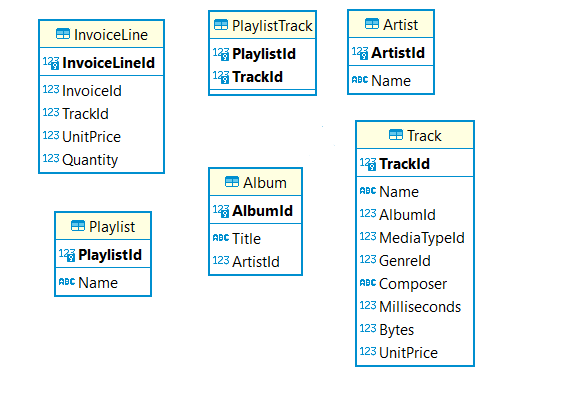

**Réponse :**

- <u>Relation</u>: InvoiceLine --- Track <u>Clé primaire</u>: Track[TrackId] <u>Clé étrangère</u>: InvoiceLine[TrackId]
- <u>Relation</u>: PlaylistTrack --- Playlist <u>Clé primaire</u>: Playlist[PlaylistId] <u>Clé étrangère</u>: PlaylistTrack[PlaylistId]
- <u>Relation</u>: PlaylistTrack --- Track. <u>Clé primaire</u>: Track[TrackId] <u>Clé étrangère</u>: PlaylistTrack[TrackId]
- <u>Relation</u>: Album --- Artist. <u>Clé primaire</u>: Artist[ArtistId] <u>Clé étrangère</u>: Album[ArtistId]
- <u>Relation</u>: Track --- Album. <u>Clé primaire</u>: Album[AlbumId] <u>Clé étrangère</u>: Track[AlbumId]


> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



**Réponse:**

La table Playlisttrack est une table intermédiaire.
On utilise principalement une table intermédiaire dans le cas d'une relation many to many entre deux tables.
La table intermédiaire aura une relation many to one avec chacune de ces tables permettant de gérer cette relation.
Ici par exemple entre la table Playlist et la table Track, une playlist peut avoir plusieurs titres et un titre être présent dans plusieurs playlists.
la table intermédiaire PlaylistTrack permet de gérer un couple Playlist/Track

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [74]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

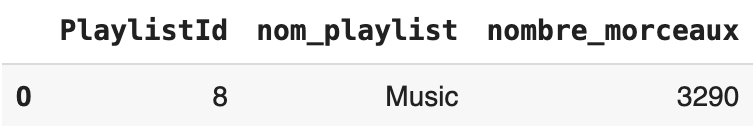

In [75]:
#la PlaylistId attendue n'est pas bonne car il y 2 playlists avec le même nombre de morceaux. Si on veut afficher les deux, il faudrait faire un rank() over() -> voir cellule suivante
pd.read_sql("""
SELECT
  pl.PlaylistId,
  pl.name as nom_playlist,
  COUNT(DISTINCT(plt.TrackId)) as nombre_morceaux
FROM playlist pl
JOIN PlaylistTrack plt on pl.PlaylistId = plt.PlaylistId
GROUP BY pl.PlaylistId, pl.name
ORDER BY nombre_morceaux DESC
LIMIT 1;
 """, conn)

,PlaylistId,nom_playlist,nombre_morceaux
0,1,Music,3290


In [76]:
pd.read_sql("""
WITH cte AS (
  SELECT
    pl.PlaylistId,
    pl.name AS nom_playlist,
    COUNT(DISTINCT plt.TrackId) AS nombre_morceaux,
    RANK() OVER (ORDER BY COUNT(DISTINCT plt.TrackId) DESC) AS rank
  FROM playlist pl
  JOIN PlaylistTrack plt ON pl.PlaylistId = plt.PlaylistId
  GROUP BY pl.PlaylistId, pl.name
)
SELECT
  PlaylistId,
  nom_playlist,
  nombre_morceaux
FROM cte
WHERE rank = 1;
""", conn)

,PlaylistId,nom_playlist,nombre_morceaux
0,1,Music,3290
1,8,Music,3290


> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 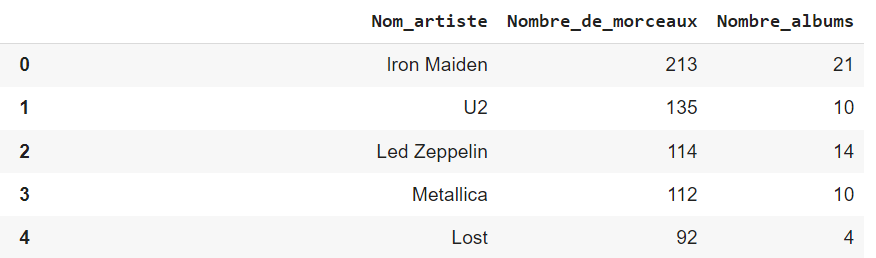

In [ ]:
pd.read_sql("""
SELECT
  ar.name as Nom_artiste,
  COUNT(DISTINCT(t.TrackId)) as Nombre_de_morceaux,
  COUNT(DISTINCT(al.AlbumId)) as Nombre_albums
FROM Artist ar
JOIN Album al on al.ArtistId = ar.ArtistId
JOIN track t on al.AlbumId = t.AlbumId
GROUP BY ar.name
ORDER BY nombre_de_morceaux DESC;
 """, conn)

,Nom_artiste,Nombre_de_morceaux,Nombre_albums
0,Iron Maiden,213,21
1,U2,135,10
2,Led Zeppelin,114,14
3,Metallica,112,10
4,Lost,92,4
...,...,...,...
199,"Academy of St. Martin in the Fields, Sir Nevil...",1,1
200,"Academy of St. Martin in the Fields, John Birc...",1,1
201,Academy of St. Martin in the Fields Chamber En...,1,1
202,Aaron Goldberg,1,1


> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

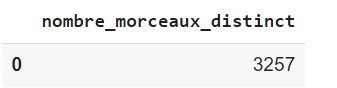

In [ ]:
pd.read_sql("""
SELECT
  COUNT(DISTINCT Name) AS nombre_morceaux_distinct
FROM Track;
 """, conn)

,nombre_morceaux_distinct
0,3257


> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

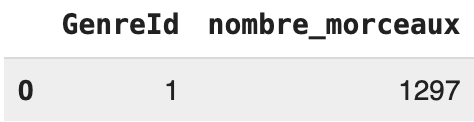

In [7]:
pd.read_sql("""
SELECT
  GenreId,
  COUNT(DISTINCT TrackId) AS nombre_morceaux
FROM Track
GROUP BY genreId
ORDER BY nombre_morceaux DESC
LIMIT 1;
 """, conn)

,GenreId,nombre_morceaux
0,1,1297


---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**

- Le RGPD (Règlement Général sur la Protection des Données) est une loi européenne entrée en vigueur en 2018 visant à renforcer la protection des données personnelles des citoyens de l’UE en leur donnant plus de contrôle sur l’utilisation de leurs informations.
- Objectif principal : Garantir la confidentialité, la transparence, la sécurité et le contrôle des données personnelles, en imposant des règles strictes aux entreprises sur la collecte, le traitement et la conservation des données, notamment par le consentement des individus.

---

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**

"Quand tu fais ta requête pour récupérer un descriptif par arrondissement, le code response que tu reçois t'indiques si la requête a fonctionné ou non.
- Si il te renvoie un <Response [200]>, ça signifie que la requête a réussi et que le serveur a bien trouvé des données en retour. Donc normalement, tu as bien reçu un descriptif pour l'arrondissement demandé.
- Si il te renvoie un <Response [404]> le serveur te dit "je n'ai rien trouvé". Donc l'URL ou la ressource que tu cherches n'existe pas, ou il y a peut-être une erreur dans ta requête (mauvais nom d'arrondissement, problème d'API, etc.). Si tu as un 404, vérifie bien que tu fais la bonne demande avec les bons paramètres !"

---


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [ ]:
import requests

link = "https://api-adresse.data.gouv.fr/reverse/?lon=" + str(longitude_appartement) + "&lat=" + str(latitude_appartement) #Variable encodée pour changer facilement les données si besoin
docu = requests.get(link).json() # requête HTTP GET à l'URL spécifiée dans la variable link

# Le json est un dictionnaire, on va l'explorer "à la main" pour trouver l'adresse en regardant la valeur de chaque clé avec docu.keys()
# La clé 'features' a pour valeur une liste des réponses pertinentes dans l'ordre de pertinence, donc l'indice 0 est la meilleure réponse
# L'indice 0 est un dictionnaire qui contient les données voulues dans la clé 'properties'
# La valeur de la clé 'propoerties' est un dictionnaire qui range l'adresse complète dans les clés 'name', 'postcode' et 'city'

In [ ]:
adresse = docu['features'][0]['properties']['name'] + " " + docu['features'][0]['properties']['postcode'] + " " + docu['features'][0]['properties']['city']
print(adresse)

111 Rue Damrémont 75018 Paris


---

# Pandas _(2 heures)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


> 7. **Compétence C2.6** Supprimer les valeurs aberrantes, qui ont une surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [ ]:
df_outliers = df_transactions[df_transactions['surface_reelle_bati'] > 6000] # Création du df_outliers
df_transactions = df_transactions[df_transactions['surface_reelle_bati'] < 6000] #suppression valeurs aberrantes
len(df_outliers) # réponse question

4

> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
df_transactions.isna().sum() # Aucune valeur manquante

,0
id_mutation,0
valeur_fonciere,0
surface_reelle_bati,0
prix_m2,0
nombre_pieces_principales,0
type_local,0
nom_commune,0
nom_iris,0
code_commune,0
code_departement,0


> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [ ]:
df_transactions['type_local'].unique() # Une seule valeur 'appartement'. La valeur 'local industriel' était dans les outliers supprimmés

array(['appartement'], dtype=object)

> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [ ]:
reponse =  df_transactions[['type_local', 'surface_reelle_bati']].groupby('type_local').agg('mean')

reponse


,surface_reelle_bati
type_local,
appartement,47.356643


---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [66]:
adresse = "8 Passage Petit Cerf 75017 Paris"


In [67]:
import re

def code_postal(x):
    rendu = re.search(r'\b\d{5}\b', x)
    return rendu.group()

# \b : Un délimiteur de mot pour s'assurer qu'on capture un "mot entier" (donc pas une partie d'un autre nombre).
# \d{5} : Cherche exactement 5 chiffres consécutifs.
# .group() : Récupère le code postal trouvé dans l'adresse.

reponse = code_postal(adresse)

reponse


'75017'

## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**

- **Scrum master** : Assure que l'équipe suit les principes et pratiques Scrum, aide à lever les obstacles qui bloquent l'équipe et veille à la bonne collaboration entre les membres. Il est un coach et un facilitateur pour l'équipe. Son focus sera sur l'efficacité de l'équipe, la gestion des processus et la résolution des problèmes qui surviennent.

- **Product owner** : Il est le représentant du client au sein de l'équipe. Il gère une liste priorisée de toutes les fonctionnalités, améliorations, corrections de bugs et tâches nécessaires pour le développement du produit (le "Product Backlog"). C'est lui qui priorise les tâches en fonction de la valeur ajoutée pour le produit. Il doit s'assurer que l'équipe développe ce qui est nécessaire et utile pour atteindre les objectifs du produit. Son focus sera sur la vision du produit et la valeur ajoutée du travail effectué par l'équipe

---

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [ ]:
df_flats = df_transactions[df_transactions['type_local'] == 'appartement']
len(df_flats)

48921

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [ ]:
df_flats = df_flats[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales", "code_commune"]]

> **Compétence C3.5** 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



- **Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données**
  - On pourrait ajouter une colonne 'description' à notre df_flats, qui contiendrait une description de chaque bien.
- **En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données df_flats**
  - Cette variable permettrait d'enrichir les informations sur chaque bien immobilier (ex: "Bel appartement au dernier étage d'un immeuble ensoleillé"). Elle fournirait des détails qualitatifs sur le bien, ce qui pourrait aider à mieux comprendre ses caractéristiques
- **Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ?**
  - Avant de pouvoir exploiter la colonne 'description' pour l'entraînement d'un modèle, il faut nettoyer et transformer le texte brut en une forme compréhensible pour le modèle de machine learning. On aura besoin de plusieurs actions de nettoyage :
    - *Suppression des caractères spéciaux* : Supprimer les caractères inutiles comme les ponctuations, les symboles etc.
    - *Conversion en minuscules* : Pour éviter de traiter la casse
    - *Suppression des stopword* : Retirer les mots courants et peu informatifs comme "le", "de", "et", "à", etc.
    - *Tokenisation* : Découper le texte en mots individuels
    - *Stemming/Lemmatizing* : Réduire les mots à leur racine/Réduire les mots à leur forme de base
    - *Vectorisation* : Les modèles de machine learning n'acceptent pas directement du texte brut, donc il faut convertir ce texte en vecteurs numériques.
  - Une fois la colonne 'description' transformée en vecteurs numériques, on peut ajouter ces vecteurs en tant que variables explicatives dans le modèle de machine learning.
- **Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?**
  - L'ajout de cette colonne de texte peut avoir un impact significatif sur les performances du modèle car les descriptions textuelles ajoutent une grande précision supplémentaire que les variables numériques seules ne peuvent pas avoir.
  - Il peut toute fois y avoir des effet négatifs comme une *augmentation de la dimensionnalité*, ce qui peut rendre l'entraînement plus long et plus complexe ou un *risque de sur-apprentissage* (overfitting)
    

**Réponse**

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [ ]:
X = df_flats[['surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]
y = df_flats['valeur_fonciere']

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [ ]:
X_cc = pd.get_dummies(X['code_commune'])
X_final = pd.concat([X.drop('code_commune', axis = 1), X_cc], axis = 1)
X_final

,surface_reelle_bati,nombre_pieces_principales,75101,75102,75103,75104,75105,75106,75107,75108,...,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
0,25,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,12,1,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,9,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,111,6,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,29,2,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53180,18,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53181,27,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53182,28,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53183,28,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# L'entrainement de ML doit se faire sur des colonnes dont le nom est un str, or les noms des colonnes après get_dummies sont des entiers (code postal)
X_final.columns = X_final.columns.astype(str)

> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, train_size=0.8, random_state=0)

> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression

> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

print(f"Score d'entrainement {LR.score(X_train, y_train)}")
print(f"Score de test {LR.score(X_test, y_test)}")

Score d'entrainement 0.8479844132294845
Score de test 0.8500053934600471


**Réponse:**

- La métrique utilisée pour évaluer le score du modèle est le coefficient de détermination R² (metrique par défaut avec le .score() pour une régression de scikit-learn). Le score R² mesure la proportion de la variance de la variable cible (ici 'valeur_fonciere') qui est expliquée par les variables explicatives. Plus sa valeur est proche de 1 plus le modèle est performant.
- Ici les scores de performances du modèle sur les jeux d'entrainement et de test sont très proches, car arrondis à 2 décimales ils donnent tous les deux 0.85. Cela indique que le modèle est robuste et qu'il ne souffre pas de sur-apprentissage (overfitting). Un score de 0.85 est relativement élevé, ce qui suggère que le modèle explique une grande partie de la variance de la cible, ce qui est un bon signe de performance.
- Le modèle est donc performant et robuste, capable de bien généraliser aux données non vues (jeu de test)

> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

**Réponse :**

- L'algorithme de régression linéaire essaie de trouver une relation mathématique qui correspond au mieux aux relations entre les caractéristiques des biens immobiliers ( ici surface, nombre de pièces, localisation) et leur prix. Le modèle utilise des poids appris à partir des données d'entraînement pour prédire le prix des nouveaux biens en appliquant la même logique.

- Par exemple, si on avait qu'une seule variable explicative en X, on pourrait faire un graph nuage de point avec X en abcisse et y en ordonnée. L'algorithme de régression linéaire chercherait alors à tracer la droite qui passerait au plus proche de tous ces points, et l'utiliserait ensuite pour déterminer un y en fonction d'un nouveau X. Si il y a x variables, il y aurait un graphique
avec x dimensions, et la droite serait remplacée par un hyperplan, ce qui es difficile à concevoir pour l'esprit humain, mais que la machine peut faire sans problèmes.

- Les variables clés utilisées pour prédire les prix dans le modèle sont:
  - **surface_reelle_bati** : Plus la surface est grande, plus le prix tend à être élevé.
  - **nombre_pieces_principales** : Un bien avec plus de pièces peut être plus attractif et donc plus cher.
  - **code_commune** : Code postal. La localisation a un impact fort sur le prix.

> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

In [ ]:
corr_matrix = df_flats.corr()
corr_matrix

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune
valeur_fonciere,1.000000,0.908142,0.750153,-0.166078
surface_reelle_bati,0.908142,1.000000,0.840113,-0.062434
nombre_pieces_principales,0.750153,0.840113,1.000000,-0.023447
code_commune,-0.166078,-0.062434,-0.023447,1.000000


**Réponse :**


- Les deux variables qui ont la la corrélation la plus élevée avec y sont
 - surface_reelle_bati :0.91
 - nombre_pieces_principales : 0.75

### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [ ]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison
1,141270.0,48,2,appartement
2,117000.0,38,1,appartement
3,220000.0,80,3,maison
4,553200.0,144,4,maison
...,...,...,...,...
112578,222500.0,85,4,appartement
112579,189000.0,50,3,maison
112580,703950.0,130,4,maison
112581,178500.0,82,5,maison


> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [ ]:
X = df_ml_idf[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales']]
y = df_ml_idf['type_local']

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 0.8516643350431905
Score de test 0.7935337744815029


**Réponse :**

- Le score affiché ici est l'accuracy, qui est la proportion de bonnes prédictions parmi l'ensemble des prédictions réalisées. C'est la métrique par défaut utilisée par .score() dans sklearn pour un classificateur.
- Evaluation des performances :
  - Score d'entraînement : 85.17 %
  - Score de test : 79.35 %
  - On observe une baisse de performance entre l'entraînement et le test. Cela signifie que le modèle généralise un peu moins bien aux nouvelles données qu'à l'entrainement.
- Interprétation :
  - Un score relativement élevé en entraînement indique que le modèle s'adapte plutôt bien aux données fournies.
  - La différence entre entraînement et test montre un léger overfitting : le modèle mémorise un peu trop les données d'entraînement et a plus de mal à s'adapter aux nouvelles données.

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

**Réponse :**

- Si les données sont mal réparties entre le jeu d'entraînement et le jeu de test, le modèle peut mal généraliser. Par exemple, si certaines classes sont sous-représentées dans le jeu d'entraînement, la prédiction sur ces classes sera mauvaise.
- Un simple découpage en un seul jeu d'entraînement et un seul jeu de test ne garantit pas des résultats stables.
- On ne s'entraîne que sur une partie des données (généralement 70-80 %). Cela signifie qu'on ne tire pas parti de toutes les informations pour l'entraînement.
- Risque de surajustement (overfitting) ou sous-ajustement (underfitting) : Un modèle trop complexe peut sur-apprendre les données d'entraînement et mal performer en test (overfitting), ou au contraire un modèle trop simple peut ne pas capturer la structure des données (underfitting).

> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

In [ ]:
y_pred = model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['type réel'], colnames=['type prédit'])

type prédit,appartement,maison
type réel,,
appartement,7824,2403
maison,2246,10044


**Réponse :**


- On observe ici que pour 10227 appartements, le modèle a bien prédit 7824 mais en a prédit 2403 en maison. De même pour 12290 maisons, le modèle en a bien prédit 10044 mas en a prédit 2246 en appartement
- Métrique precision : Mesure la proportion de prédictions positives correctes parmi toutes celles qui ont été classées comme positives.
  - Dans notre exemple : precision_appart = Vrais Positifs/(Vrais Positifs+Faux Positifs)= 7824 / (7824 +2246) ≈ 0.777
  - Quand il dit "appartement", il se trompe environ 22,3 % du temps
- Metrique recall : Le recall mesure la proportion de cas positifs correctement détectés parmi tous les cas réellement positifs.
  - Dans notre exemple : Recall_appart = Vrais Positifs/ (Vrais Positifs +Faux Negatifs) =7824/ (7824+2403) ≈ 0.765
  - Il a loupé environ 23,5 % des vrais appartements

# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

In [77]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
link_predict = "https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv"
df_dc = pd.read_csv(link_predict)

In [11]:
df_dc

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


In [12]:
# 'designation' et 'region_2' : beaucoup de NaN et absents de df_dc. 'taster_twitter_handle' inutile pour cette étude
df = df.drop(['designation', 'region_2', 'taster_twitter_handle'], axis = 1)

In [13]:
# On va commencer par créer une colonne 'millesime'. Pour cela on va extraire le millésime de la colonne 'title' et le mettre dans une nouvelle colonne:
df['millesime'] = df['title'].str.extract(r'\b(19[4-9][0-9]|20[0-2][0-9])\b') # recherche un nombre à 4 chiffres pouvant correspondre à un millésime logique (avant 1940 ils ne sont pas pertinents)
df['millesime'] = df['millesime'].astype('float')

In [15]:
(df.isna().sum() / len(df) * 100).round(2)


,0
country,0.05
description,0.00
points,0.00
price,6.92
province,0.05
region_1,16.35
taster_name,20.19
title,0.00
variety,0.00
winery,0.00


In [16]:
# 0.05% de valeurs manquantes pour country et province, une seule pour variety, et 3.56% pour le millésime, on va les supprimer car cela n'impactera pas énormément le dataset.
df = df[(df['country'].isna() == False) & (df['province'].isna() == False) & (df['variety'].isna() == False) & (df['millesime'].isna() == False)]

In [17]:
df.describe() # Ici on va choisir de supprimer les valeurs manquantes de prix car il y en a moins de 7%, a confirmer avec le client si il ne préfère pas remplacer par la médiane

,points,price,millesime
count,125263.000000,116748.000000,125263.000000
mean,88.484956,35.651189,2016.680632
std,3.040580,31.382051,3.631486
min,80.000000,2.000000,1943.000000
25%,86.000000,21.000000,2015.000000
50%,88.000000,29.000000,2017.000000
75%,91.000000,42.000000,2019.000000
max,100.000000,1902.000000,2023.000000


In [18]:
df = df[df['price'].isna() == False]

In [19]:
(df.isna().sum() / len(df) * 100).round(2)


,0
country,0.00
description,0.00
points,0.00
price,0.00
province,0.00
region_1,16.33
taster_name,20.18
title,0.00
variety,0.00
winery,0.00


In [20]:
# Il reste les valeurs manquantes dans les colonnes 'region_1' et 'taster_name' qui ne sont pas indispensables pour l'étude, on va donc les remplir avec une valeur "unknown"
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')

In [21]:
# Maintenant qu'il n'y a plus de NaN dans les millesimes, on peut les mettre en entiers
df['millesime'] = df['millesime'].astype('int')

In [22]:
# On reset l'index pour qu'il soit propre après les suppressions
df = df.reset_index().drop('index', axis = 1)

In [30]:
# Création d'une colonne 'catégorie de prix' pour créer un filtre plus tard

def categorize_price(price):
  if price < 10:
    return "moins de 10$"
  elif 10 <= price < 20:
    return "entre 10$ et 20$"
  elif 20 <= price < 30:
    return "entre 20$ et 30$"
  elif 30 <= price < 50:
    return "entre 30$ et 50$"
  elif 50 <= price < 100:
    return "entre 50$ et 100$"
  else:
    return "Plus de 100$"


df['price_range'] = df['price'].apply(categorize_price)


In [33]:
df

,country,description,points,price,province,region_1,taster_name,title,variety,winery,millesime,price_range
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,20.0,Douro,unknown,Roger Voss,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2017,entre 20$ et 30$
1,US,"Tart and snappy, the flavors of lime flesh and...",87,18.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2019,entre 10$ et 20$
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,18.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2019,entre 10$ et 20$
3,US,"Much like the regular bottling from 2016, this...",87,44.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018,entre 30$ et 50$
4,Spain,Blackberry and raspberry aromas show a typical...,87,20.0,Northern Spain,Navarra,Michael Schachner,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2017,entre 20$ et 30$
...,...,...,...,...,...,...,...,...,...,...,...,...
116743,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,29.0,Mosel,unknown,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2019 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2019,entre 20$ et 30$
116744,US,Citation is given as much as a decade of bottl...,90,92.0,Oregon,Oregon,Paul Gregutt,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation,2010,entre 50$ et 100$
116745,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2019,entre 30$ et 50$
116746,France,"A dry style of Pinot Gris, this is crisp with ...",90,33.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2018,entre 30$ et 50$


In [34]:
# Export en csv pour powerBI
df.to_csv("donnees_vin.csv", index = False)

## Création d'un WordCloud des vins Français pour ambellir le powerBI


In [35]:
import nltk
nltk.download('popular', quiet=True)#importe la base

True

In [36]:
nltk.download('punkt_tab') # package qui contient des tokenizers pour séparer les phrases et mots dans différentes langues.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords') # Liste des stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
def supprimer_ponctuation(texte):
  for caractere in texte:
    if caractere.isalpha() == False and caractere != ' ':
      texte = texte.replace(caractere, '')
  return texte.lower()

In [47]:
#On va faire un lemmatizing pour avoir des résultats plus juste et un wordcloud plus pertinent à la fin.
!python -m spacy download en_core_web_sm #Exécute le module spacy en ligne de commande, télécharge et installe le modèle de langue "en_core_web_sm"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [48]:
import spacy
nlp = spacy.load("en_core_web_sm") # charge le modèle de langue spaCy "en_core_web_sm"

def stopword_lemma(x):
  rendu = []
  doc = nlp(" ".join(x)) # applique le modèle spaCy sur le texte remis en string
  for word in doc:
    if word.text not in stopwords.words("english"): # Si le mot brut n'est pas dans la liste des stopwords:
      rendu.append(word.lemma_) # ajoute le mot lemmatisé à la liste qui sera rendue
  return rendu


### WordCloud International

In [72]:
df_glob = df.copy() # Le .copy() permet d'avoir une vraie copie et non une vue
df_glob['description'] = df_glob['description'].apply(supprimer_ponctuation)
df_glob['description'] = df_glob['description'].apply(lambda x : nltk.word_tokenize(x)) # transforme chaque texte en une liste de mots (tokens)

In [73]:
df_glob['description'] = df_glob['description'].apply(stopword_lemma)

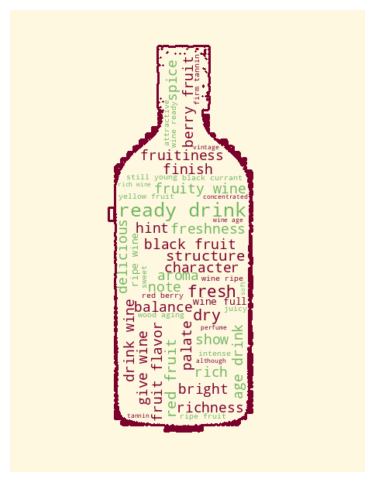

In [51]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Joindre toutes les descriptions en une seule grande chaîne
text = " ".join(df_glob['description'].apply(lambda x: " ".join(x)))
all_text = re.sub(r'\bwine\b', '', text) # On retire le mot wine car on se doute qu'il va beaucoup tomber sans être pertinent

mask_image2 = np.array(Image.open("/content/wordcloud.png")) # importation d'une image de bouteille

# Définir la palette de couleurs (bordeaux, vert)
colors = ["#7B002C", "#73B761"]

# Créer le WordCloud avec des couleurs personnalisées
wordcloud = WordCloud(
    width=1000,
    height=400,
    background_color="#FEF8E0",
    mask=mask_image2,
    max_words=50,
    contour_color="#7B002C",
    contour_width=3,
    max_font_size=100,
    color_func=lambda *args, **kwargs: np.random.choice(colors)  # Appliquer les couleurs personnalisées
).generate(all_text)
# Afficher le WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Pour ne pas afficher les axes
plt.show()


### WordCloud France

In [69]:
df_fr = df[df['country'] == "France"].copy() # Le .copy() permet d'avoir une vraie copie et non une vue
df_fr['description'] = df_fr['description'].apply(supprimer_ponctuation)
df_fr['description'] = df_fr['description'].apply(lambda x : nltk.word_tokenize(x)) # transforme chaque texte en une liste de mots (tokens)

In [70]:
df_fr['description'] = df_fr['description'].apply(stopword_lemma)

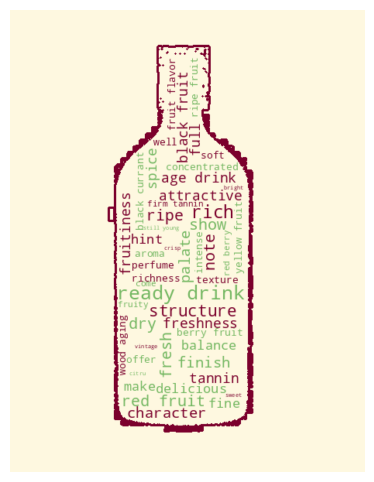

In [71]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Joindre toutes les descriptions en une seule grande chaîne
text = " ".join(df_fr['description'].apply(lambda x: " ".join(x)))
all_text = re.sub(r'\bwine\b', '', text) # On retire le mot wine car on se doute qu'il va beaucoup tomber sans être pertinent

mask_image2 = np.array(Image.open("/content/wordcloud.png")) # importation d'une image de bouteille

# Définir la palette de couleurs (bordeaux, vert)
colors = ["#7B002C", "#73B761"]

# Créer le WordCloud avec des couleurs personnalisées
wordcloud = WordCloud(
    width=1000,
    height=400,
    background_color="#FEF8E0",
    mask=mask_image2,
    max_words=50,
    contour_color="#7B002C",
    contour_width=3,
    max_font_size=100,
    color_func=lambda *args, **kwargs: np.random.choice(colors)  # Appliquer les couleurs personnalisées
).generate(all_text)
# Afficher le WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Pour ne pas afficher les axes
plt.show()


### WordCloud Pinot noir

In [61]:
df_pn = df[(df['country'] == "France") & (df['variety'] == "Pinot Noir")].copy() # Le .copy() permet d'avoir une vraie copie et non une vue
df_pn['description'] = df_pn['description'].apply(supprimer_ponctuation)
df_pn['description'] = df_pn['description'].apply(lambda x : nltk.word_tokenize(x)) # transforme chaque texte en une liste de mots (tokens)

In [62]:
df_pn['description'] = df_pn['description'].apply(stopword_lemma)

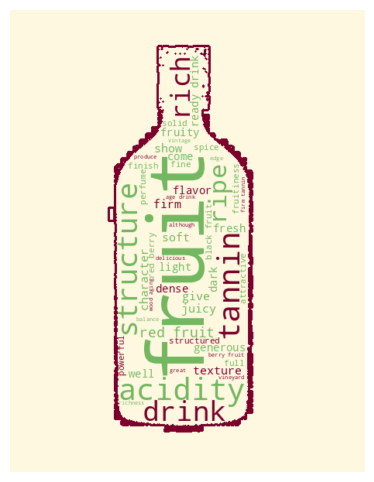

In [68]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Joindre toutes les descriptions en une seule grande chaîne
text = " ".join(df_pn['description'].apply(lambda x: " ".join(x)))
all_text = re.sub(r'\bwine\b', '', text) # On retire le mot wine car on se doute qu'il va beaucoup tomber sans être pertinent

mask_image2 = np.array(Image.open("/content/wordcloud.png")) # importation d'une image de bouteille

# Définir la palette de couleurs (bordeaux, vert)
colors = ["#7B002C", "#73B761"]

# Créer le WordCloud avec des couleurs personnalisées
wordcloud = WordCloud(
    width=1000,
    height=400,
    background_color="#FEF8E0",
    mask=mask_image2,
    max_words=50,
    contour_color="#7B002C",
    contour_width=3,
    max_font_size=100,
    color_func=lambda *args, **kwargs: np.random.choice(colors)  # Appliquer les couleurs personnalisées
).generate(all_text)
# Afficher le WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Pour ne pas afficher les axes
plt.show()
